# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upgrade pip for safer side

In [2]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


# Install Required Libraries

In [3]:
!pip install ultralytics
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


# Import the libraries required

In [4]:
import os
import random
import shutil
import yaml
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Check the GPU availability

In [5]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Load/Download the YOLOv9c model

In [6]:
# Load the YOLOv9c model
model = YOLO('yolov9c.pt')

100%|██████████| 49.4M/49.4M [00:00<00:00, 114MB/s] 


# Transfer the loaded model to GPU

In [7]:
# Send the model to GPU device
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): RepNCSPELAN4(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Sequential(
          (0): RepCSP(
            (cv1): Conv(
              (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
              

# Define base paths for dataset images and labels. Check the paths existence

In [8]:
# Define paths for images and labels
base_path = '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3'

# Check for folder accessibility
!ls -lrt $base_path

total 16
drwx------ 2 root root 4096 Nov 23 11:27 'All labels with Pose information'
drwx------ 2 root root 4096 Nov 23 11:30  test
drwx------ 2 root root 4096 Nov 23 11:31  train
drwx------ 2 root root 4096 Nov 23 11:36  val


In [9]:
# Form the proper train, test and val images paths
train_image_folder = os.path.join(base_path, 'train/images/')
train_label_folder = os.path.join(base_path, 'train/labels/')

print(f"Train images folder is: {train_image_folder}")
print(f"Train images lable folder is: {train_label_folder}")

test_image_folder = os.path.join(base_path, 'test/images/')
test_label_folder = os.path.join(base_path, 'test/labels/')

print(f"Test images folder is: {test_image_folder}")
print(f"Test images lable folder is: {test_label_folder}")

val_image_folder = os.path.join(base_path, 'val/images/')
val_label_folder = os.path.join(base_path, 'val/labels/')

print(f"Validation images folder is: {val_image_folder}")
print(f"Validation images lable folder is: {val_label_folder}")

Train images folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/images/
Train images lable folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/labels/
Test images folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/test/images/
Test images lable folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/test/labels/
Validation images folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/val/images/
Validation images lable folder is: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-5

In [10]:
def check_paths_existence(path_to_check):
  if os.path.exists(path_to_check):
    print(f"Valid path: {path_to_check}")
  else:
    print(f"Invalid path: {path_to_check}")

In [11]:
check_paths_existence(train_image_folder)
check_paths_existence(train_label_folder)
check_paths_existence(test_image_folder)
check_paths_existence(test_label_folder)
check_paths_existence(val_image_folder)
check_paths_existence(val_label_folder)

Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/images/
Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/labels/
Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/test/images/
Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/test/labels/
Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/val/images/
Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/val/labels/


# Ensure data.yaml is existing

In [12]:
# Check for data.yaml file existence
data_yaml_path = "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/data.yaml"
!ls -lrt $data_yaml_path

-rw------- 1 root root 568 Nov 24 03:00 /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/data.yaml


# Ensure the loaded model parameters are as expected

In [13]:
# Print the Ultralytics default settings JSON file for YOLOv9c
!cat /root/.config/Ultralytics/settings.json

{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}

In [14]:
# Print the model's yaml file
model.model.yaml

{'nc': 80,
 'backbone': [[-1, 1, 'Conv', [64, 3, 2]],
  [-1, 1, 'Conv', [128, 3, 2]],
  [-1, 1, 'RepNCSPELAN4', [256, 128, 64, 1]],
  [-1, 1, 'ADown', [256]],
  [-1, 1, 'RepNCSPELAN4', [512, 256, 128, 1]],
  [-1, 1, 'ADown', [512]],
  [-1, 1, 'RepNCSPELAN4', [512, 512, 256, 1]],
  [-1, 1, 'ADown', [512]],
  [-1, 1, 'RepNCSPELAN4', [512, 512, 256, 1]],
  [-1, 1, 'SPPELAN', [512, 256]]],
 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 6], 1, 'Concat', [1]],
  [-1, 1, 'RepNCSPELAN4', [512, 512, 256, 1]],
  [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 4], 1, 'Concat', [1]],
  [-1, 1, 'RepNCSPELAN4', [256, 256, 128, 1]],
  [-1, 1, 'ADown', [256]],
  [[-1, 12], 1, 'Concat', [1]],
  [-1, 1, 'RepNCSPELAN4', [512, 512, 256, 1]],
  [-1, 1, 'ADown', [512]],
  [[-1, 9], 1, 'Concat', [1]],
  [-1, 1, 'RepNCSPELAN4', [512, 512, 256, 1]],
  [[15, 18, 21], 1, 'Detect', ['nc']]],
 'scale': '',
 'yaml_file': 'yolov9c.yaml',
 'ch': 3}

In [15]:
# Print model state dictionary
model.model.state_dict().keys()

odict_keys(['model.0.conv.weight', 'model.0.bn.weight', 'model.0.bn.bias', 'model.0.bn.running_mean', 'model.0.bn.running_var', 'model.0.bn.num_batches_tracked', 'model.1.conv.weight', 'model.1.bn.weight', 'model.1.bn.bias', 'model.1.bn.running_mean', 'model.1.bn.running_var', 'model.1.bn.num_batches_tracked', 'model.2.cv1.conv.weight', 'model.2.cv1.bn.weight', 'model.2.cv1.bn.bias', 'model.2.cv1.bn.running_mean', 'model.2.cv1.bn.running_var', 'model.2.cv1.bn.num_batches_tracked', 'model.2.cv2.0.cv1.conv.weight', 'model.2.cv2.0.cv1.bn.weight', 'model.2.cv2.0.cv1.bn.bias', 'model.2.cv2.0.cv1.bn.running_mean', 'model.2.cv2.0.cv1.bn.running_var', 'model.2.cv2.0.cv1.bn.num_batches_tracked', 'model.2.cv2.0.cv2.conv.weight', 'model.2.cv2.0.cv2.bn.weight', 'model.2.cv2.0.cv2.bn.bias', 'model.2.cv2.0.cv2.bn.running_mean', 'model.2.cv2.0.cv2.bn.running_var', 'model.2.cv2.0.cv2.bn.num_batches_tracked', 'model.2.cv2.0.cv3.conv.weight', 'model.2.cv2.0.cv3.bn.weight', 'model.2.cv2.0.cv3.bn.bias', '

# Define a method to empty GPU cache for safer side

In [16]:
# Method to empty GPU's cache before executing any step
def empty_gpu_cache():
    torch.cuda.empty_cache()

# Check the GPU Performance

In [17]:
!nvidia-smi

Sun Nov 24 05:27:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              30W /  70W |    215MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [19]:
# Train the YOLOv9c model

def train_model(data_yaml, device, epochs=3, imgsz=640):

    results = model.train(
        data=data_yaml,
        epochs=epochs,
        imgsz=imgsz,
        device=device,
        batch=8,
        workers=8,
        optimizer='AdamW',
        lr0=0.001,
        lrf=0.01,
        momentum=0.937,
        weight_decay=0.0005,
        warmup_epochs=3.0,
        warmup_momentum=0.8,
        warmup_bias_lr=0.1,
        box=7.5,
        cls=0.5,
        dfl=1.5,
        pose=12.0,
        kobj=1.0,
        label_smoothing=0.0,
        nbs=64,
        overlap_mask=True,
        mask_ratio=4,
        dropout=0.0,
        val=True,
    )
    return results

In [20]:
# Call the empty_gpu_cache method to empty GPU cache
empty_gpu_cache()

In [21]:
# Train the model
train_results = train_model(data_yaml_path, device)
print("\n\n\n\n")
print("Training completed. Results are as follows: \n", train_results)

engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/data.yaml, epochs=3, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 42.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 181MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/labels.cache... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/train/images/flood_image0407_3.png: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/val/labels.cache... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       6.9G      1.246     0.8517      1.015         35        640: 100%|██████████| 767/767 [33:22<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:08<00:00,  1.87it/s]


                   all       2043      72123      0.779      0.663      0.715      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      6.99G      1.156     0.7498     0.9934        104        640: 100%|██████████| 767/767 [06:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:02<00:00,  2.04it/s]


                   all       2043      72123      0.821      0.682      0.745      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      6.89G      1.096     0.7019     0.9777         65        640: 100%|██████████| 767/767 [06:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:05<00:00,  1.96it/s]


                   all       2043      72123      0.824      0.694      0.758      0.489

3 epochs completed in 0.832 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:12<00:00,  1.76it/s]


                   all       2043      72123      0.823      0.695      0.758      0.489
Speed: 0.3ms preprocess, 13.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train





Training completed. Results are as follows: 
 ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9afa802560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.0290

In [22]:
# Call the empty_gpu_cache method to empty GPU cache
empty_gpu_cache()

In [23]:
def evaluate_model():
    results = model.val()
    return results

In [24]:
# Evaluate the model
eval_results = evaluate_model()
print("Evaluation is completed. Results are as follows: \n")
print(eval_results)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/CV_Datasets/C2A_Dataset/C2A_Dataset/new_dataset3/val/labels.cache... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 256/256 [01:55<00:00,  2.21it/s]


                   all       2043      72123      0.824      0.696      0.759      0.494
Speed: 0.3ms preprocess, 30.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2
Evaluation is completed. Results are as follows: 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9af2475e70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029

# Transfer the results to Google Drive

In [38]:
check_paths_existence("/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/")

Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/


In [40]:
# Define source and destination paths
source_folder = "/content/runs"
destination_folder = "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the folder to Google Drive
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

'/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs'

In [45]:
# Function to list all copied results
def list_files_and_folders(path):
    # Check if the path exists
    if os.path.exists(path):
        # List all files and directories in the path
        files_and_folders = os.listdir(path)

        # Separate files and directories
        directories = [f for f in files_and_folders if os.path.isdir(os.path.join(path, f))]
        files = [f for f in files_and_folders if os.path.isfile(os.path.join(path, f))]

        print(f"Files in '{path}':")
        for file in files:
            print(file)

        print(f"\nDirectories in '{path}':")
        for directory in directories:
            print(directory)
    else:
        print(f"The path {path} does not exist.")

In [46]:
copied_yolov9c_results_path = "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs"
list_files_and_folders(copied_yolov9c_results_path)

Files in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs':

Directories in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs':
detect


In [47]:
list_files_and_folders(f"{copied_yolov9c_results_path}/detect")

Files in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect':

Directories in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect':
train2
train


In [48]:
list_files_and_folders(f"{copied_yolov9c_results_path}/detect/train2")

Files in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect/train2':
confusion_matrix.png
R_curve.png
P_curve.png
val_batch1_labels.jpg
F1_curve.png
val_batch2_pred.jpg
val_batch0_labels.jpg
confusion_matrix_normalized.png
val_batch1_pred.jpg
val_batch0_pred.jpg
PR_curve.png
val_batch2_labels.jpg

Directories in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect/train2':


In [50]:
list_files_and_folders(f"{copied_yolov9c_results_path}/detect/train")

Files in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect/train':
results.png
confusion_matrix.png
R_curve.png
P_curve.png
val_batch1_labels.jpg
F1_curve.png
labels_correlogram.jpg
val_batch2_pred.jpg
val_batch0_labels.jpg
confusion_matrix_normalized.png
train_batch1.jpg
val_batch1_pred.jpg
train_batch2.jpg
val_batch0_pred.jpg
args.yaml
train_batch0.jpg
events.out.tfevents.1732426080.8a66e8fb3358.352.0
PR_curve.png
results.csv
labels.jpg
val_batch2_labels.jpg

Directories in '/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_runs/detect/train':
weights


# Copy base models as well to Google Drive for safer side

In [52]:
# Define source and destination paths
base_model_source = "/content/yolov9c.pt"
base_model_destination = "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_model.pt"

# Copy the folder to Google Drive
shutil.copy(base_model_source, base_model_destination)

'/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_model.pt'

In [53]:
check_paths_existence(base_model_destination)

Valid path: /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-521_CV/AAI-521_Final_Team_Project/yolov9c_base_model.pt


# Visualize Performance Metrics

In [56]:
from IPython.display import Image

In [54]:
results_base_path = f"{copied_yolov9c_results_path}/detect/train"

## Final Results Graphs

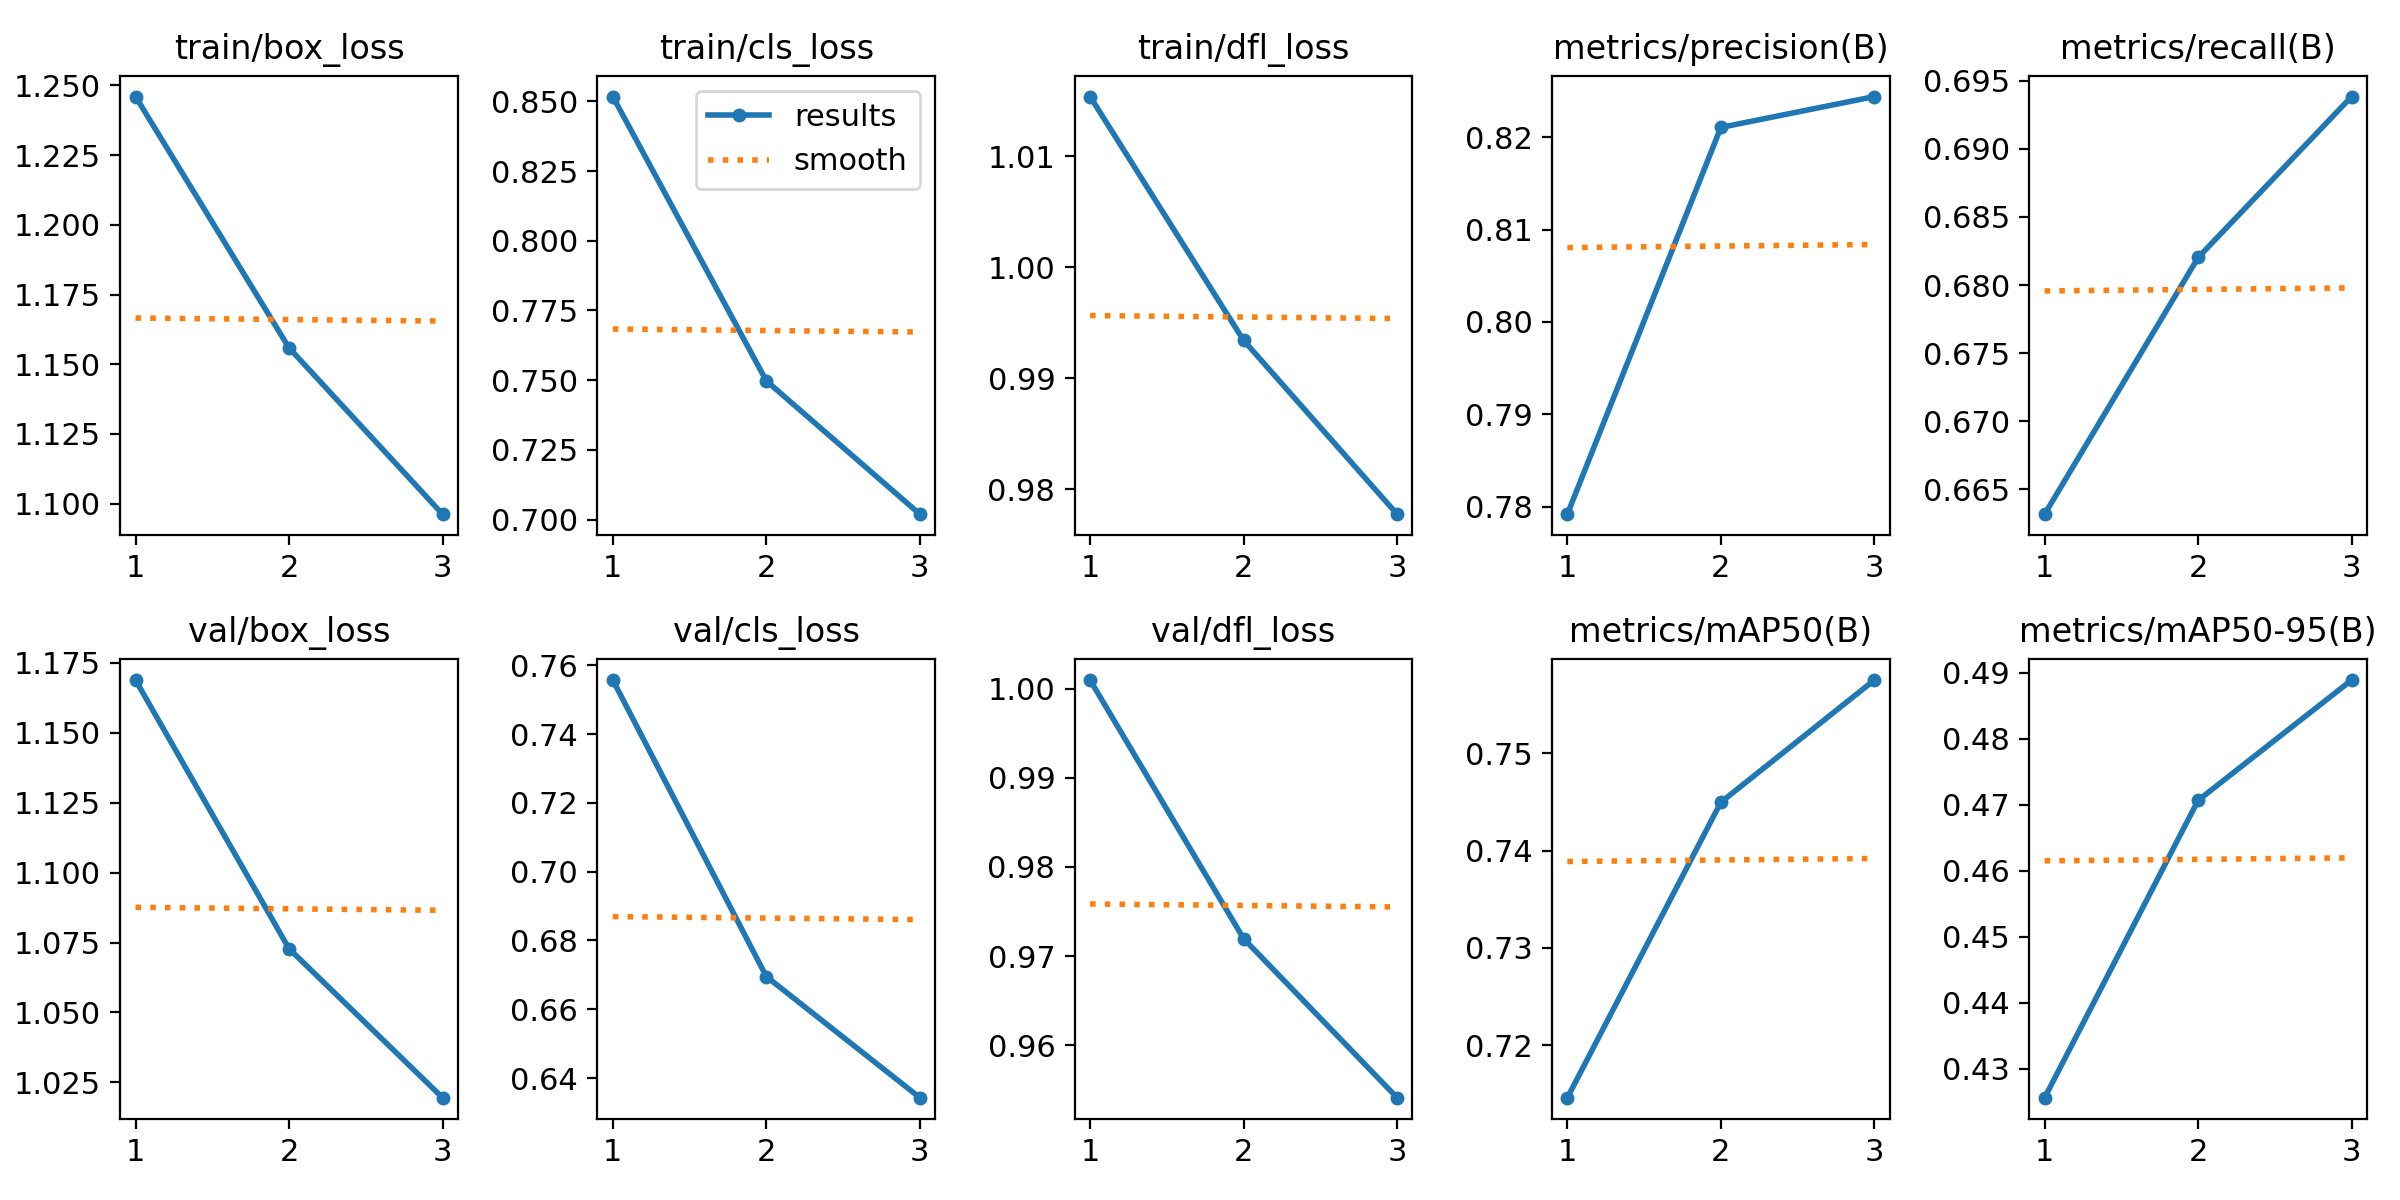

In [57]:
Image(filename=f"{results_base_path}/results.png")

## Confusion Matrix

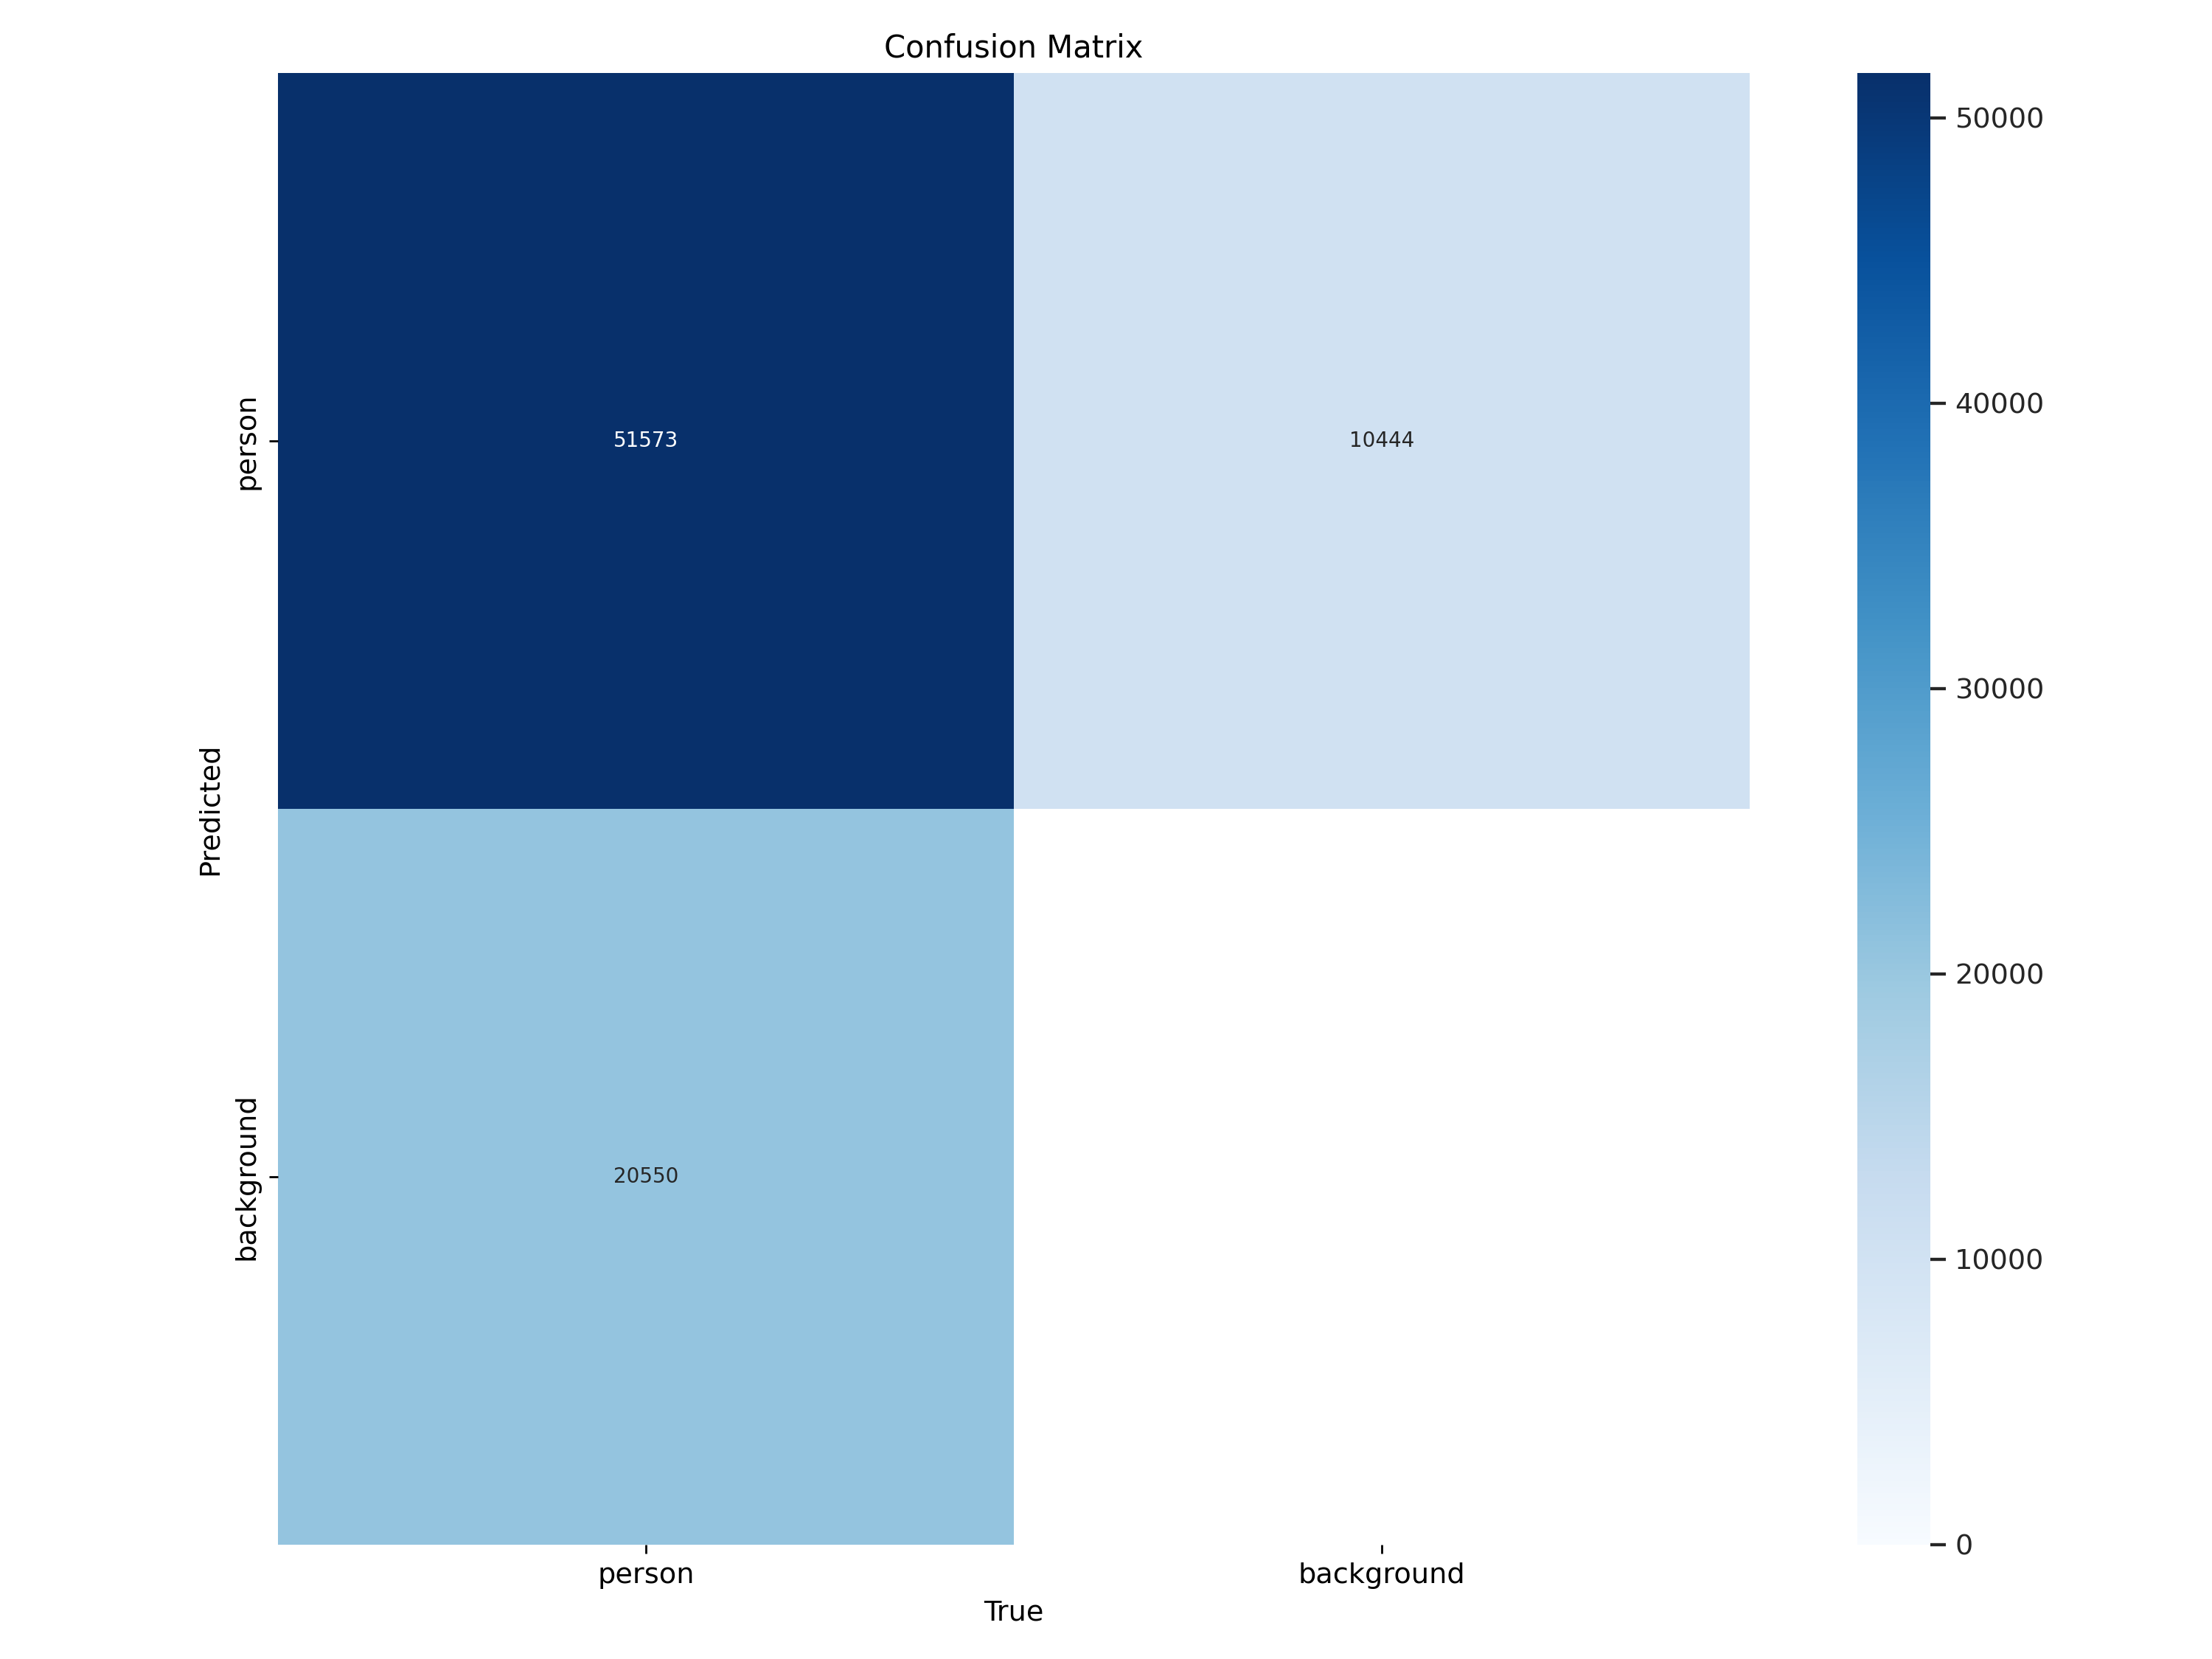

In [58]:
Image(filename=f"{results_base_path}/confusion_matrix.png")

## F1-score, PR, P and R Curves

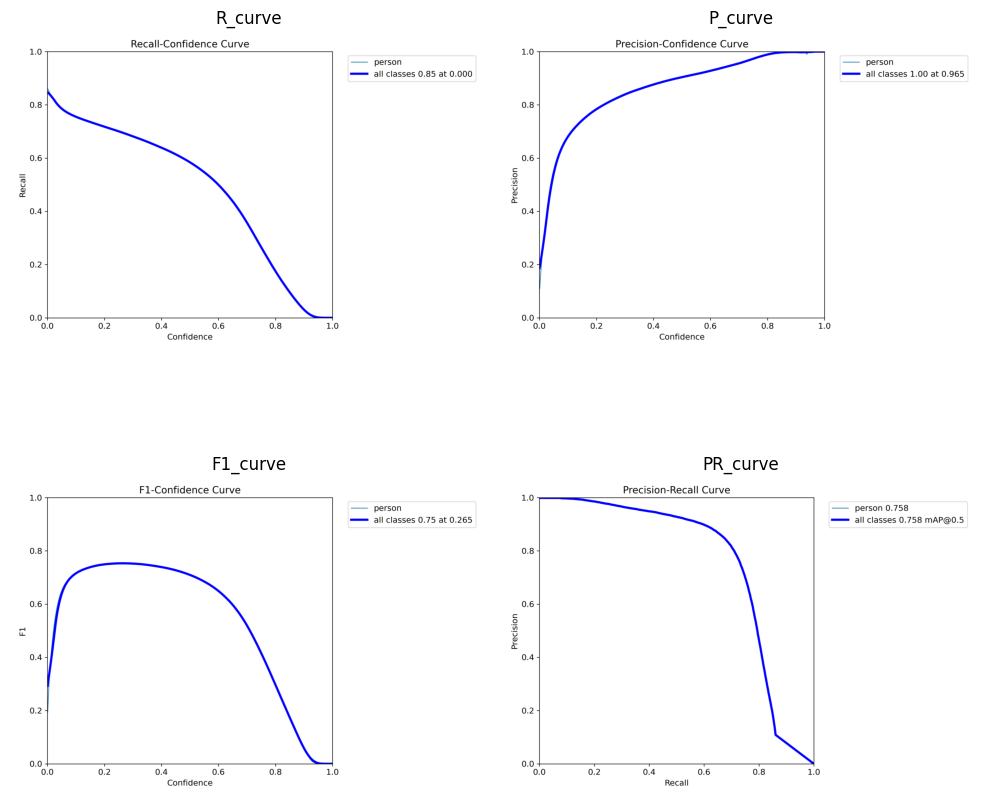

In [64]:
import matplotlib.image as mpimg

# Load performance images
img1 = mpimg.imread(f"{results_base_path}/R_curve.png",)
img2 = mpimg.imread(f"{results_base_path}/P_curve.png",)
img3 = mpimg.imread(f"{results_base_path}/F1_curve.png",)
img4 = mpimg.imread(f"{results_base_path}/PR_curve.png")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display each image in a separate subplot
axs[0, 0].imshow(img1)
axs[0, 0].set_title('R_curve')
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].set_title('P_curve')
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].set_title('F1_curve')
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].set_title('PR_curve')
axs[1, 1].axis('off')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

## Human Predicted Images

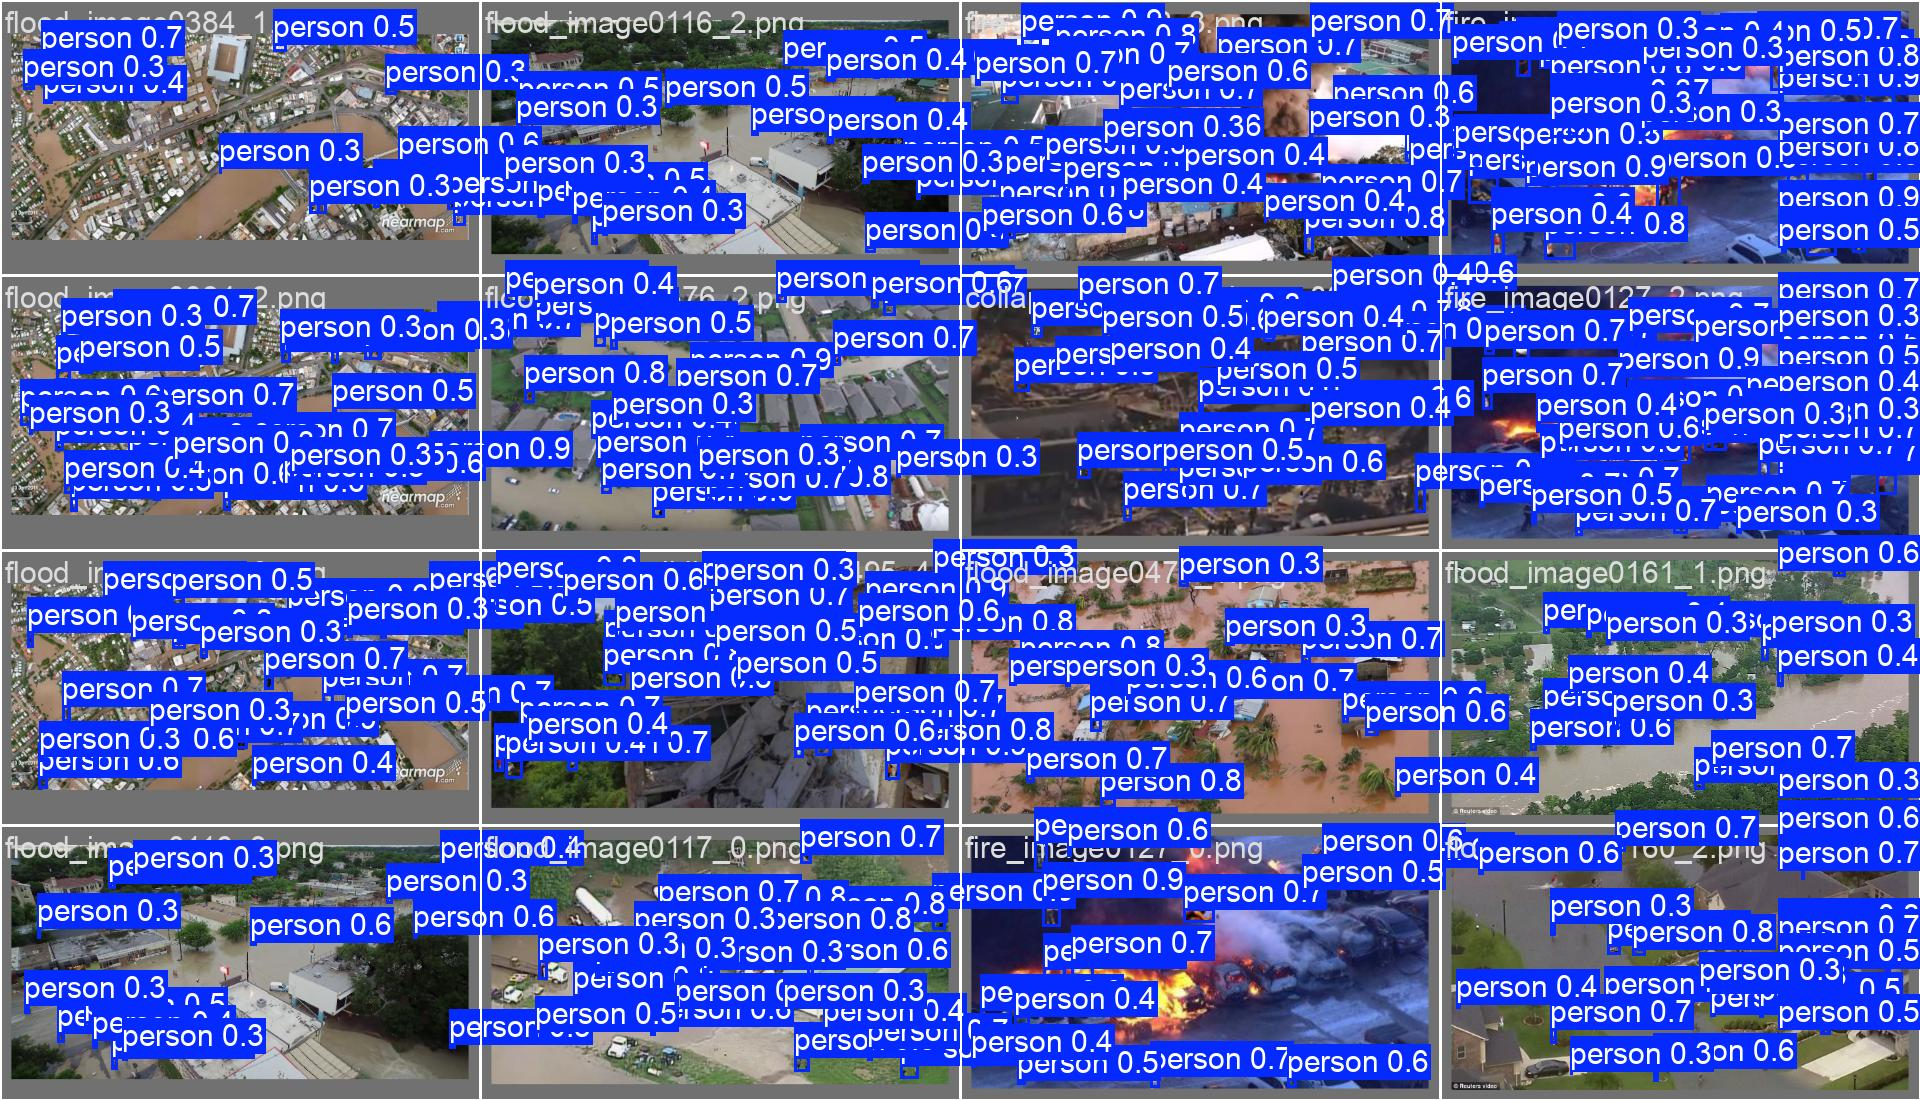

In [69]:
Image(filename=f"{results_base_path}/val_batch0_pred.jpg")

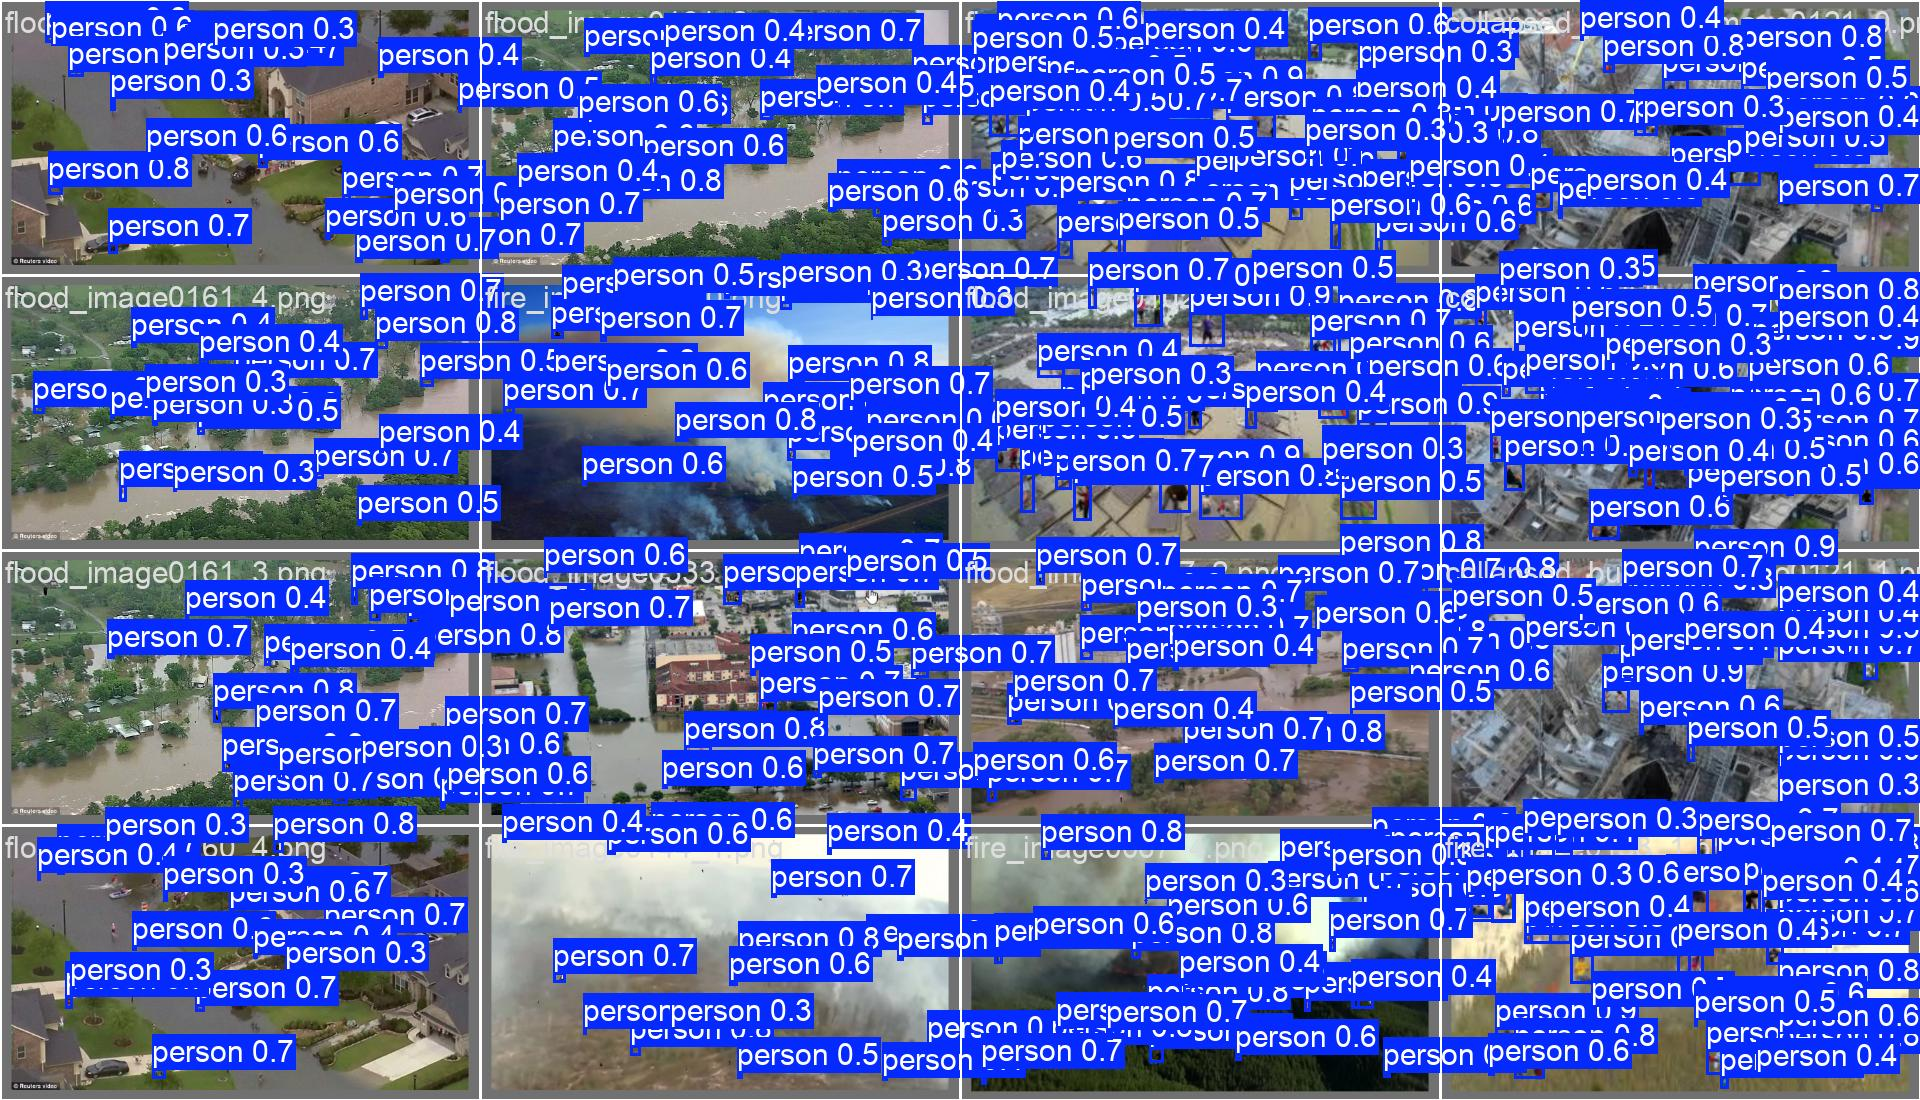

In [68]:
Image(filename=f"{results_base_path}/val_batch1_pred.jpg")

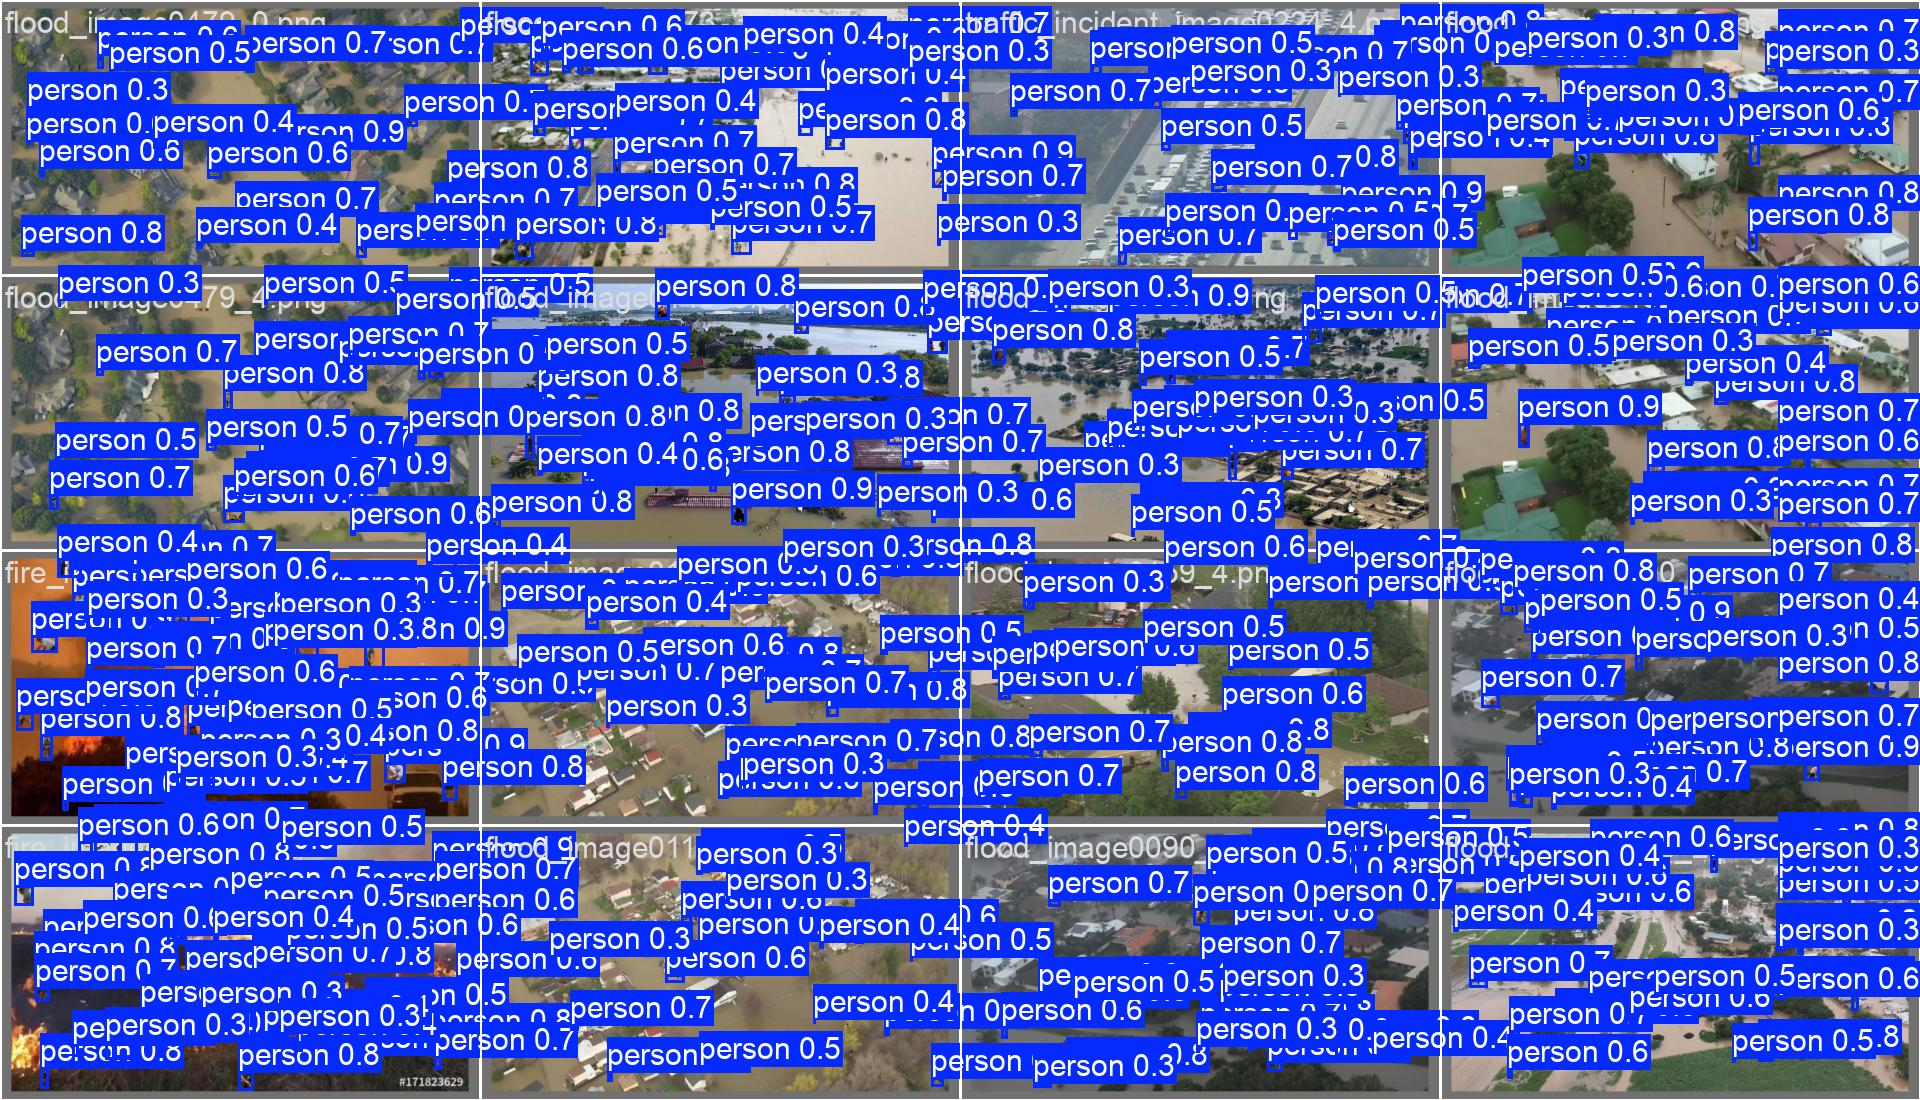

In [67]:
Image(filename=f"{results_base_path}/val_batch2_pred.jpg")

## Human Prediction on Validation Dataset

In [70]:
results_base_path = f"{copied_yolov9c_results_path}/detect/train2"

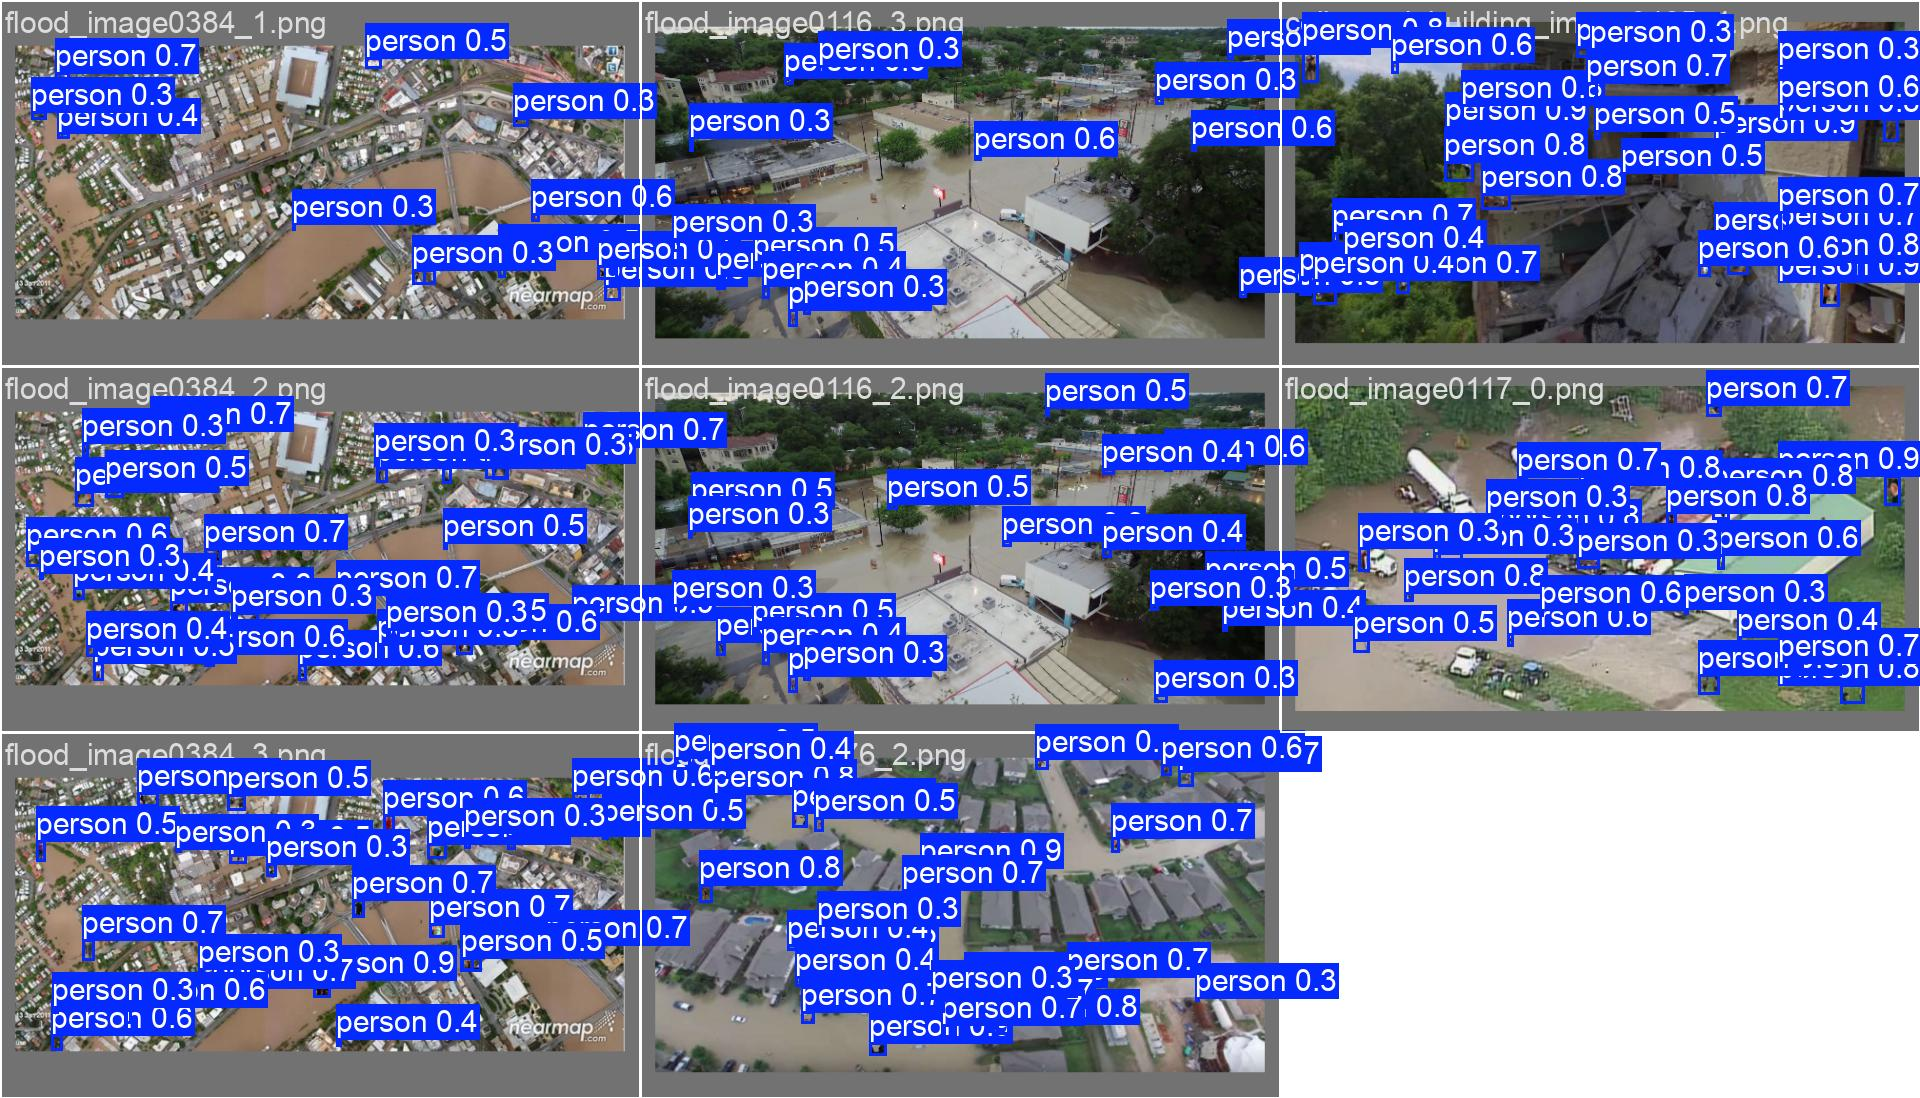

In [71]:
Image(filename=f"{results_base_path}/val_batch0_pred.jpg")

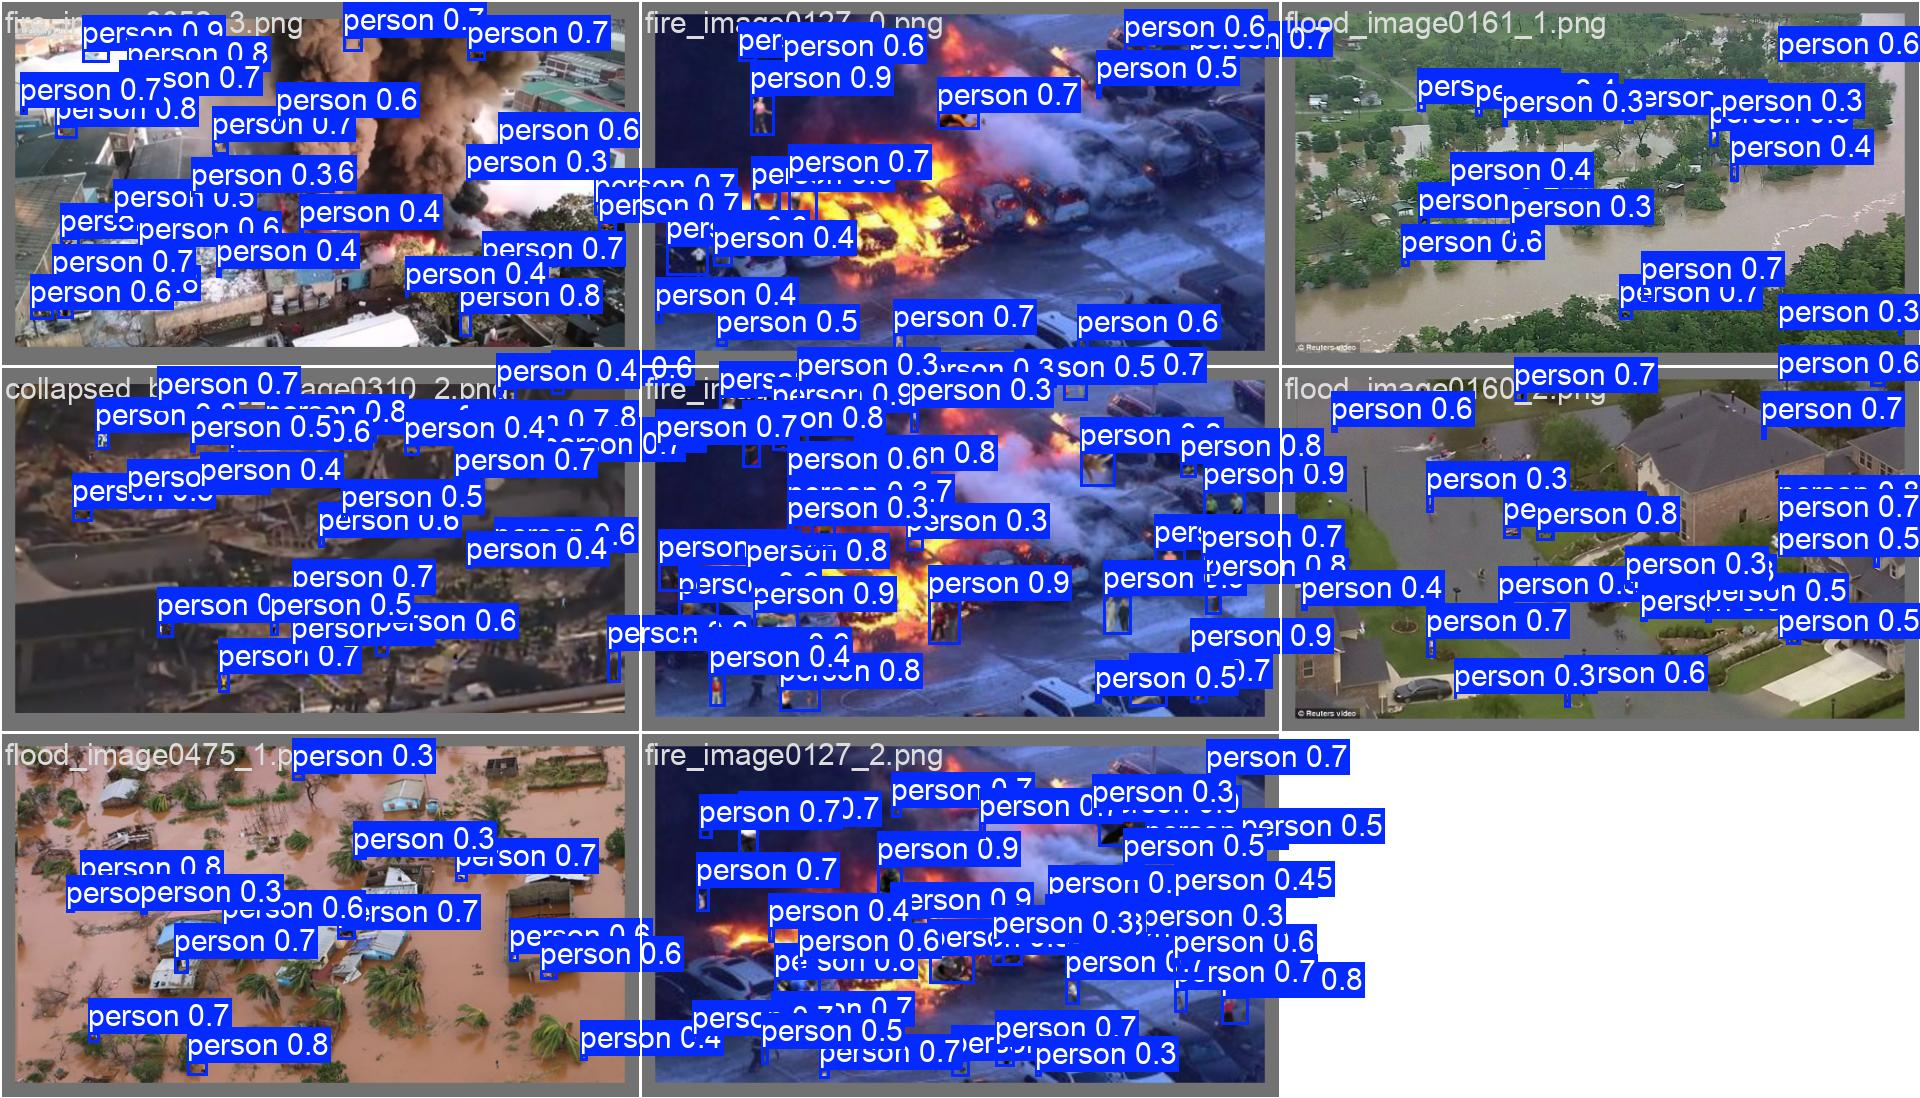

In [72]:
Image(filename=f"{results_base_path}/val_batch1_pred.jpg")

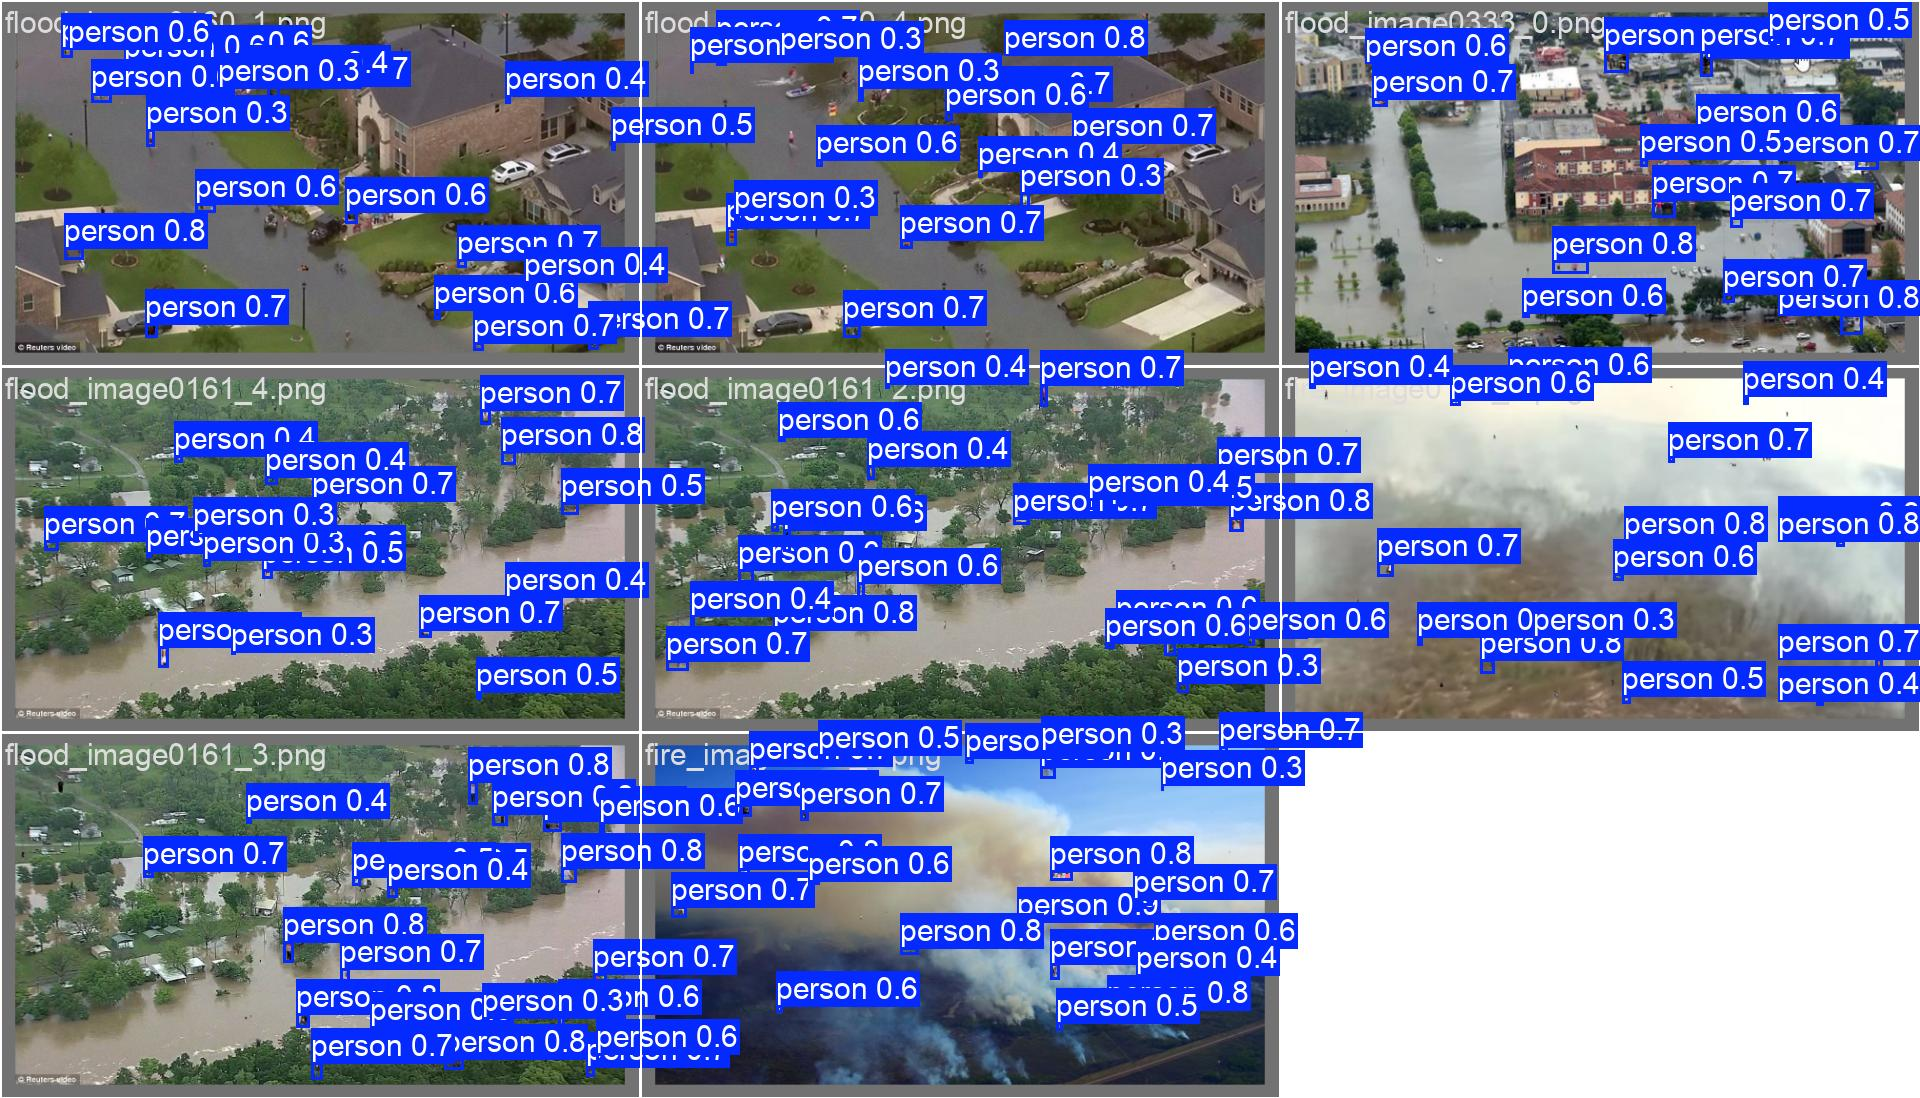

In [73]:
Image(filename=f"{results_base_path}/val_batch2_pred.jpg")